# Check out Pb fields from test runs

In [4]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle
import matplotlib

%matplotlib inline

#### Parameters:

In [2]:
# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179

# Resolution of grid cells to show in figure:
grid_reso  = 10

land_color  = '#a9a7a2'

#### Load files:

In [5]:
mfile        = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20220317.nc')
mesh_lon     = mfile['nav_lon'].values
mesh_lat     = mfile['nav_lat'].values
mask         = mfile['tmask'].values[0]
mesh_bathy   = mfile['tmask'].values[0,:,:,:]
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)
mesh_depth   = mfile['nav_lev'].values

In [22]:
folder1 = '/data/brogalla/run_storage/Pb-tuning-202210/Pb-tuning-202210-all-off/'
file1   = xr.open_dataset(f'{folder1}ANHA12_EXH006_1m_20150101_20151231_comp_201501-201501.nc')
file2   = xr.open_dataset(f'{folder1}ANHA12_EXH006_1m_20150101_20151231_comp_201512-201512.nc')
dpb1    = file1['dissolpb'].values[0,:,:,:]
dpb2    = file2['dissolpb'].values[0,:,:,:]

#### Figure:

In [18]:
def plot_layer(variable, layers, vmin=0, vmax=30, cmap1=cmocean.cm.thermal):
    
    fig, ax, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/Pb6.pickle','rb'))

    x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 
    
    for n, axis in enumerate(ax.ravel()):

        CB = axis.pcolormesh(x, y, variable[layers[n],:,:]*1e12, cmap=cmap1, vmin=vmin, vmax=vmax) 
        axis.contourf(x, y, bathy_masked[layers[n],imin:imax,jmin:jmax], colors=[land_color], zorder=2) # Mask land at particular depth
        axis.set_title(f'Depth: {mesh_depth[layers[n]]:.1f} m', fontsize=6)
    
    # Color bar: --------------------------------------------------------------------------------
#     cbaxes = fig.add_axes([0.92, 0.155, 0.02, 0.38]);
#     CBar   = plt.colorbar(CB, ax=ax1, cax=cbaxes); 
#     CBar.set_label('Dissolved Pb [pM]', fontsize=7)
#     CBar.ax.tick_params(axis='y', length=0, labelsize=7)
    
    return

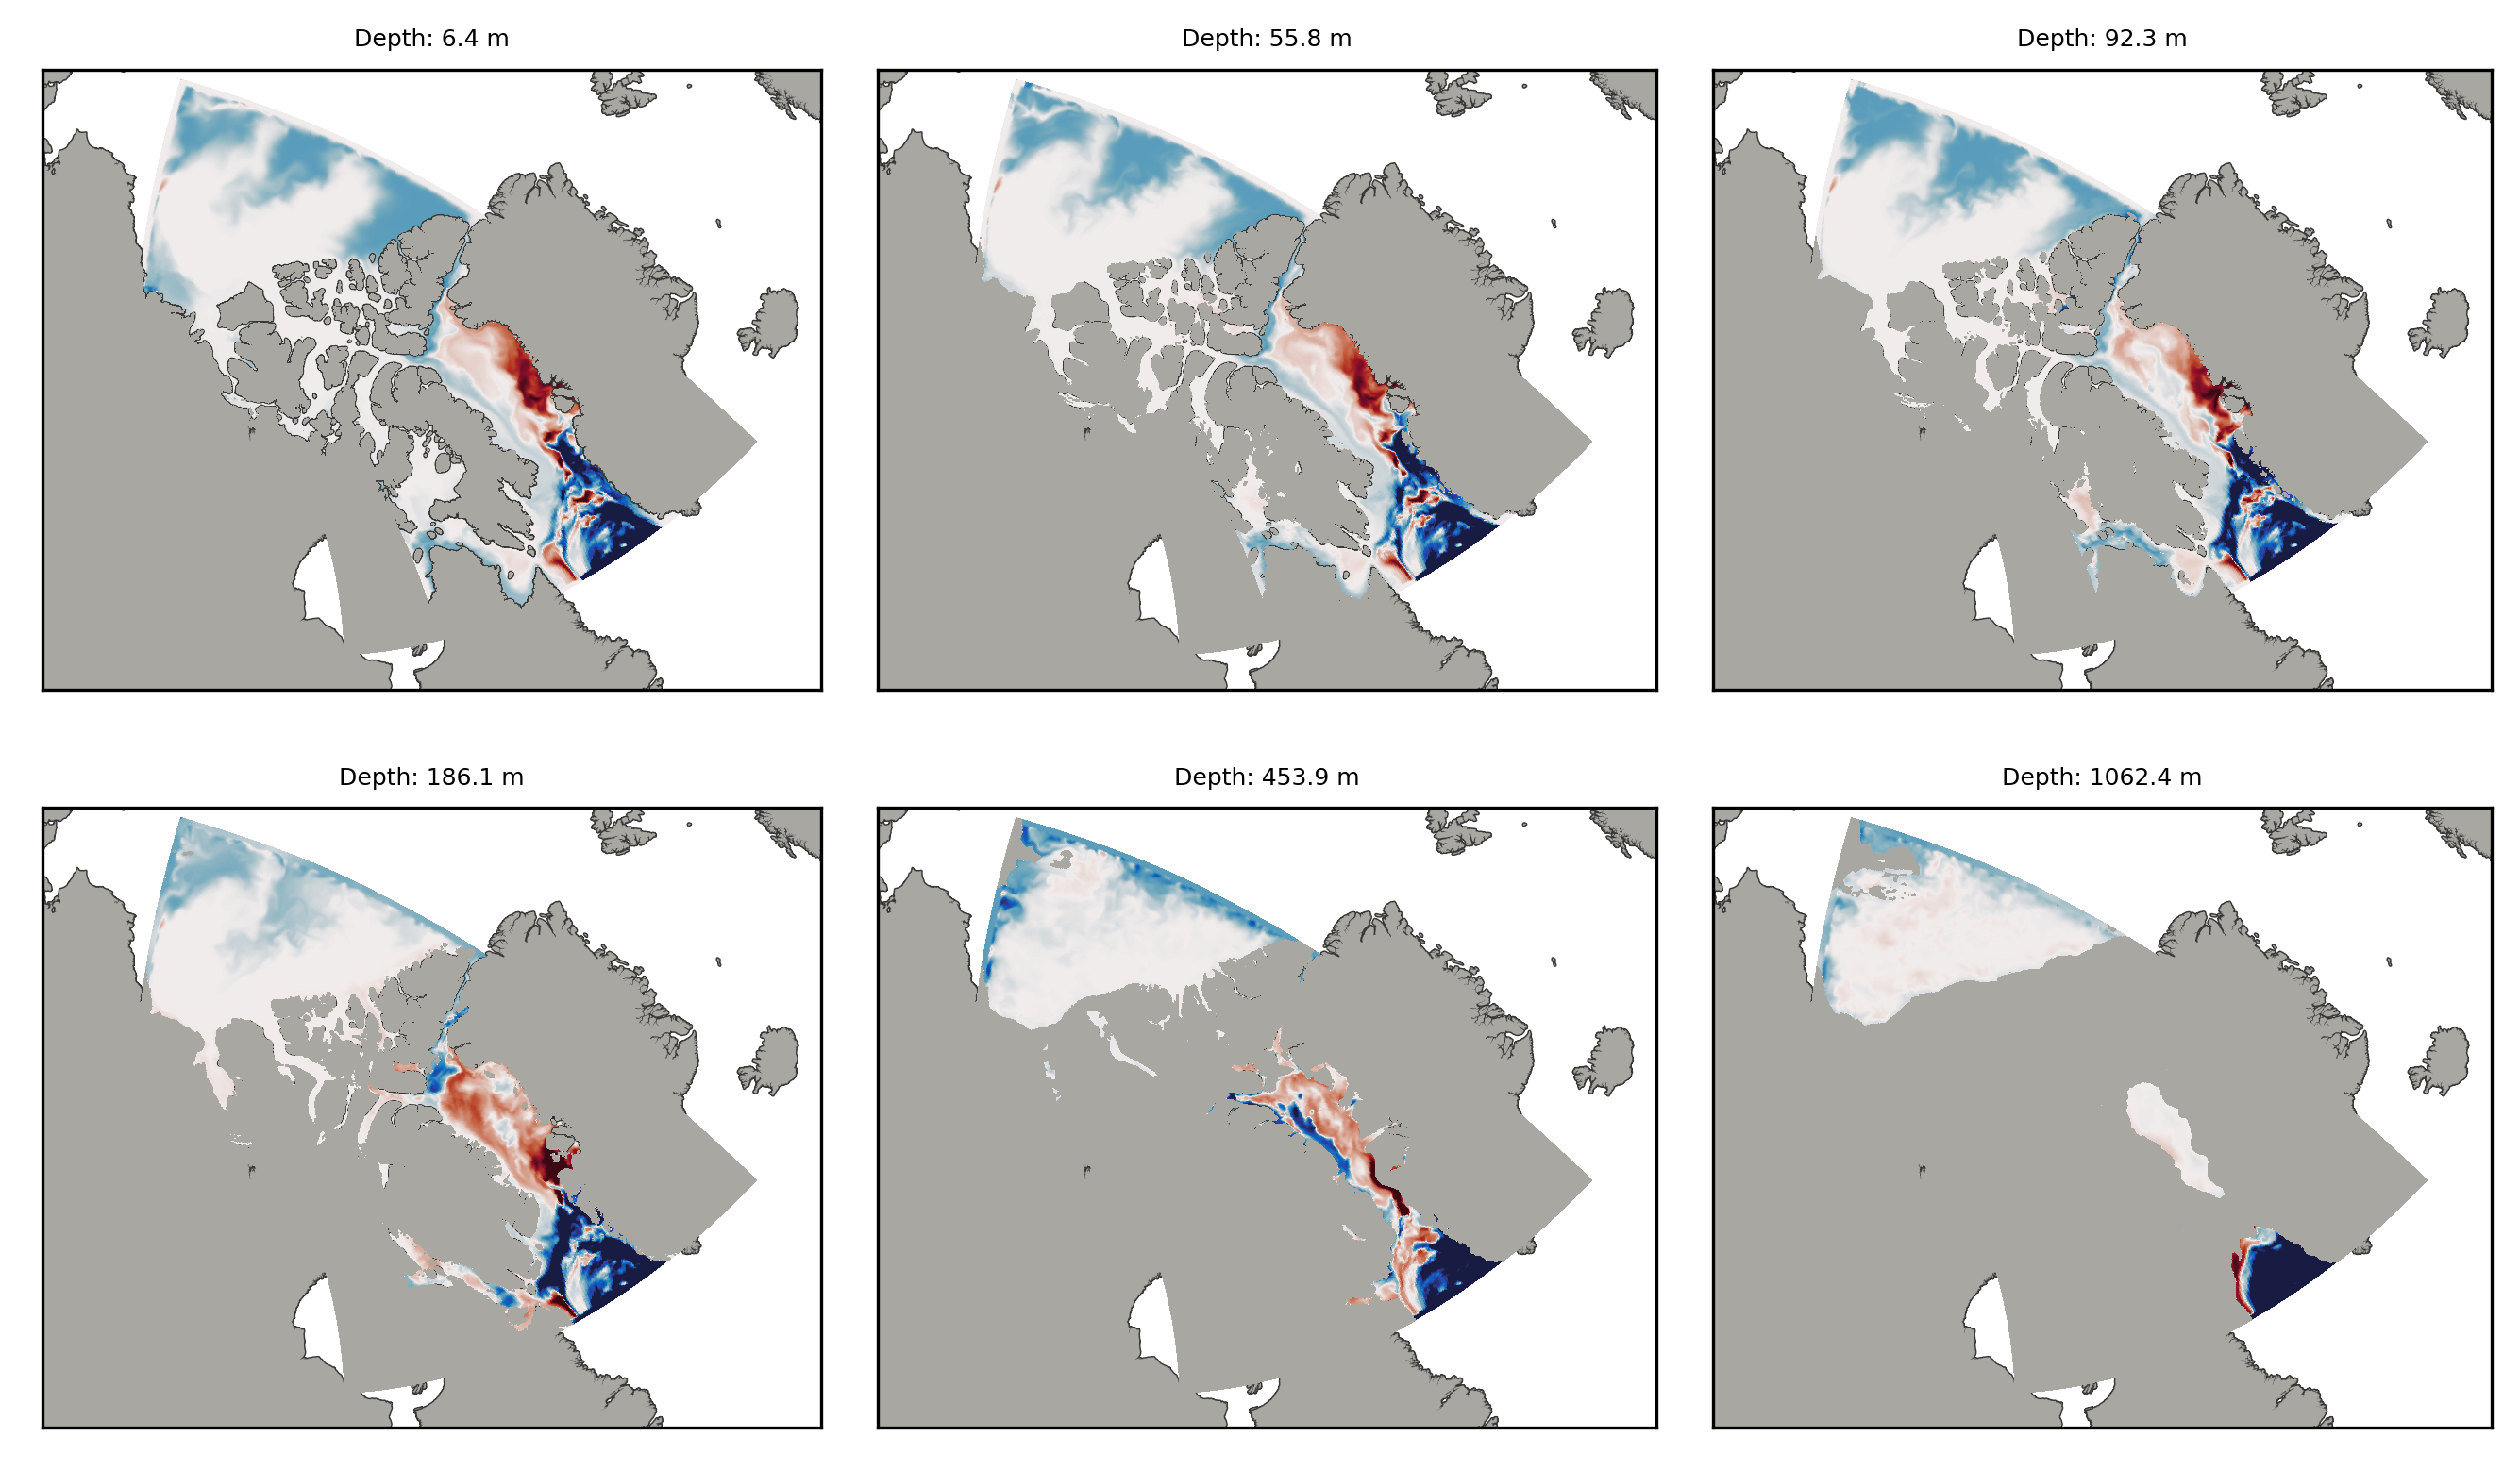

In [30]:
plot_layer(dpb2-dpb1, (5,18,21,25,30,35), vmin=-5, vmax=5, cmap1=cmocean.cm.balance)